## ***Import Library***

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import csv

**Masukan Credential Twitter**

In [2]:
consumer_key = 'Wn02Vkt660TAWh22cGPHgYVVN'
consumer_secret = 'K00OcKr1F8hUYNjd55QEvaAsGkGVeRp95J0v1Wq8QWQGt7g9my'
access_token = '2464327753-Q1LiTjp7kXD3xHJlTudQJFvbsEqVRXZj7YkMZaf'
access_token_secret = 'zDc9de9oxYo5JLs5QxnGbVXD9mnPPPg9Kw20NirDoSc5k'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

**Crawling untuk mengambil data FirstMedia**

In [36]:
new_search= "First+media"

tweets = tweepy.Cursor(api.search,
                   q= new_search,
                   lang="id",
                   since='2019-11-01').items(2000)

all_tweets=[tweet.text for tweet in tweets]
all_tweets[:5]

['@varreeen kbl LAN Modem ke PC/Laptop dan Capture data my result dr https://t.co/gbesPqFKMl ke server First Media –… https://t.co/ujkDboiSWn',
 '@FirstMediaCares wifi first media wilayah vila dago tol error ya min?duh lg PJJ nih..kasian anak-anak sekolah,ditunggu fast responnya..',
 'RT @alyycomell: bismillah first media 🤧\U0001f97a\n(nanti kalau insecure datang aku delete lah👌🏻😖) https://t.co/1KWM0J83v3',
 'RT @alyycomell: bismillah first media 🤧\U0001f97a\n(nanti kalau insecure datang aku delete lah👌🏻😖) https://t.co/1KWM0J83v3',
 '@Vitrimaslow Hi First People. Terimakasih atas informasinya. Terimakasih telah berlangganan First Media dan selamat… https://t.co/yqCZAutkWT']

**Simpan ke file CSV**

In [46]:
df = pd.DataFrame(data=all_tweets,
                  columns=["Tweets"])

df.to_csv(r'FirstMedia.csv')
df

,Tweets
0,@varreeen kbl LAN Modem ke PC/Laptop dan Captu...
1,@FirstMediaCares wifi first media wilayah vila...
2,RT @alyycomell: bismillah first media 🤧🥺\n(nan...
3,RT @alyycomell: bismillah first media 🤧🥺\n(nan...
4,@Vitrimaslow Hi First People. Terimakasih atas...
...,...
1995,@FirstMediaCares Seperti ini. Saya menggunakan...
1996,RT @aMaLsUy: Kenapa mainstream media tak sebut...
1997,RT @aMaLsUy: Kenapa mainstream media tak sebut...
1998,RT @aMaLsUy: Kenapa mainstream media tak sebut...


In [47]:
df["Tweets"]

0       @varreeen kbl LAN Modem ke PC/Laptop dan Captu...
1       @FirstMediaCares wifi first media wilayah vila...
2       RT @alyycomell: bismillah first media 🤧🥺\n(nan...
3       RT @alyycomell: bismillah first media 🤧🥺\n(nan...
4       @Vitrimaslow Hi First People. Terimakasih atas...
                              ...                        
1995    @FirstMediaCares Seperti ini. Saya menggunakan...
1996    RT @aMaLsUy: Kenapa mainstream media tak sebut...
1997    RT @aMaLsUy: Kenapa mainstream media tak sebut...
1998    RT @aMaLsUy: Kenapa mainstream media tak sebut...
1999    @Julian18592475 Hi First People. Baik, terima ...
Name: Tweets, Length: 2000, dtype: object

**Lakukan Pra Proses ( Cleaning Data )**

In [48]:
def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    #teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
    teks = hapus_emoji(teks)
    teks = re.sub(r"[-()\"#/@;_%:<>{}=~|.?,]", "", teks)
    teks = re.sub(r"aku","saya",teks)
    teks = re.sub(r"kamu","anda",teks)
    teks = re.sub(r"&amp",":",teks)
    teks = re.sub(r"yg","yang",teks)
    return teks


def hapus_emoji(teks):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',teks)


#Untuk Menghapus kata Double
def hapus_katadouble(s): 
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)


#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)

    
# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopterm.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 

    
#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    return text
    


#Apply function on review column
df["Tweets"] = df["Tweets"].apply(cleanText)

df

,Tweets
0,kbl lan modem pclaptop capture data my result ...
1,wifi first media wilayah vila dago tol error m...
2,bismillah first media 🤧🥺 nanti insecure delet...
3,bismillah first media 🤧🥺 nanti insecure delet...
4,hi first people terimakasih informasinya terim...
...,...
1995,ini wifi tetring giliran pake first media kaya...
1996,mainstream media syed saddiq kena crowd fundi...
1997,mainstream media syed saddiq kena crowd fundi...
1998,mainstream media syed saddiq kena crowd fundi...


**Tentukan Polarity dan Subjectivity**

In [49]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df["Tweets"].apply(getPolarity)
df['Subjectivity'] = df["Tweets"].apply(getSubjectivity)

df

,Tweets,Polarity,Subjectivity
0,kbl lan modem pclaptop capture data my result ...,0.250,0.333333
1,wifi first media wilayah vila dago tol error m...,0.225,0.466667
2,bismillah first media 🤧🥺 nanti insecure delet...,-0.125,0.604167
3,bismillah first media 🤧🥺 nanti insecure delet...,-0.125,0.604167
4,hi first people terimakasih informasinya terim...,0.250,0.333333
...,...,...,...
1995,ini wifi tetring giliran pake first media kaya...,0.250,0.333333
1996,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333
1997,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333
1998,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333


**Berikan Sentimen pada setiap tweet**

In [50]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,Tweets,Polarity,Subjectivity,Analysis
0,kbl lan modem pclaptop capture data my result ...,0.250,0.333333,Positive
1,wifi first media wilayah vila dago tol error m...,0.225,0.466667,Positive
2,bismillah first media 🤧🥺 nanti insecure delet...,-0.125,0.604167,Negative
3,bismillah first media 🤧🥺 nanti insecure delet...,-0.125,0.604167,Negative
4,hi first people terimakasih informasinya terim...,0.250,0.333333,Positive
...,...,...,...,...
1995,ini wifi tetring giliran pake first media kaya...,0.250,0.333333,Positive
1996,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333,Positive
1997,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333,Positive
1998,mainstream media syed saddiq kena crowd fundi...,0.250,0.333333,Positive


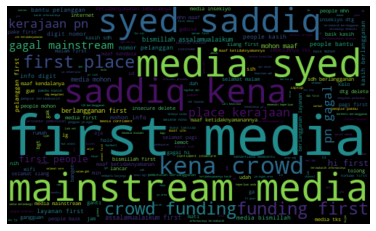

In [51]:
allWords =' '.join([twts for twts in df["Tweets"]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

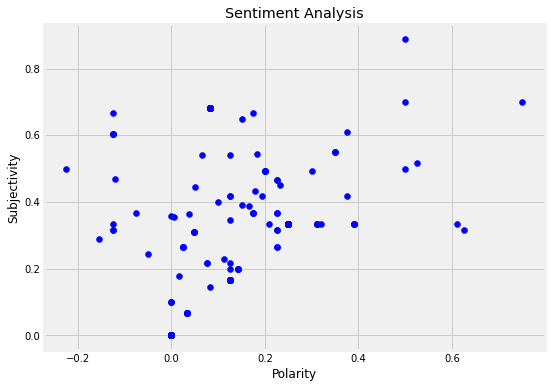

In [52]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Kesimpulan**


Sesuai data yang ada ternyata analisis sentimen yang didapat yaitu lebih banyak tweet yang Positif. Saya mengambil "First Media" karena ini merupakan provider internet di Indonesia. Melihat saat ini sedang banyak yang memasang wifi dirumahnya. Crawling yang saya gunakan yaitu menggunakan bahasa Indonesia. Untuk mendapat hasil yang lebih baik bisa di lakukan cleaning dan pembobotan kata.


Aminurachma Aisyah (17.52.0001)

In [53]:
df['Analysis'].value_counts()

Positive    1914
Neutral       73
Negative      13
Name: Analysis, dtype: int64

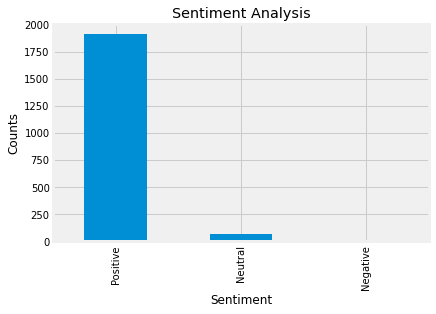

In [54]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()